Budget primitif du Département de Maine-et-Loire de 1998 à 2017.
Le budget primitif présente les prévisions budgétaires fixées en début d'année : les recettes attendues et les montants maximum de dépenses pouvant être engagés pendant la durée de l'exercice budgétaire.  

In [153]:
options(warn = -1)
suppressPackageStartupMessages(library(tidyverse))
library(treemap)
library(ggthemes)
library(ggwordcloud)
library(tm)
library(SnowballC)

In [44]:
budget <- read_csv2("Budget-primitif-departement.csv")

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  EXERCICE = col_double(),
  `LIBELLE SOUS FONCTION` = col_character(),
  `TYPE MVT` = col_character(),
  SECTION = col_character(),
  `NATURE MVTS` = col_character(),
  `BUDGET PRIMITIF` = col_double()
)


In [45]:
glimpse(budget)

Observations: 12,198
Variables: 6
$ EXERCICE                <dbl> 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1...
$ `LIBELLE SOUS FONCTION` <chr> "ABBAYE D'ASNIERES", "ABBAYE D'ASNIERES", "...
$ `TYPE MVT`              <chr> "DEPENSE", "DEPENSE", "RECETTE", "DEPENSE",...
$ SECTION                 <chr> "FONCTIONNEMENT", "FONCTIONNEMENT", "FONCTI...
$ `NATURE MVTS`           <chr> "REEL", "ORDRE", "REEL", "REEL", "ORDRE", "...
$ `BUDGET PRIMITIF`       <dbl> 8715.50, 10425.09, 0.00, 25321.79, 0.00, 0....


In [10]:
head(budget)

EXERCICE,LIBELLE SOUS FONCTION,TYPE MVT,SECTION,NATURE MVTS,BUDGET PRIMITIF
1998,ABBAYE D'ASNIERES,DEPENSE,FONCTIONNEMENT,REEL,8715.50
1998,ABBAYE D'ASNIERES,DEPENSE,FONCTIONNEMENT,ORDRE,10425.09
1998,ABBAYE D'ASNIERES,RECETTE,FONCTIONNEMENT,REEL,0.00
1998,ABBAYE DE SAINT MAUR,DEPENSE,FONCTIONNEMENT,REEL,25321.79
1998,ABBAYE DE SAINT MAUR,DEPENSE,FONCTIONNEMENT,ORDRE,0.00
1998,ABBAYE DE SAINT MAUR,RECETTE,FONCTIONNEMENT,REEL,0.00


Le jeu de données comprend 12198 observations pour 6 colonnes.  
**Attributs :**  
**EXERCICE** : année de l'exercice budgétaire  
**LIBELLE SOUS FONCTION** : objet du mouvement budgétaire  
**TYPE MVT** : recette ou dépense  
**SECTION** : budget de fonctionnement ou budget d'investissement  
**NATURE MVTS** : réel ou ordre  
**BUDGET PRMITIF** : montant fixé pour la dépense ou la recette  

# Exploration du jeu de données

Avant de visualiser ces données il convient d'explorer les colonnes du jeu de données pour les comprendre. 

In [12]:
# Nombres de valeurs uniques de chaque colonnes
map_int(budget, function(x) length(unique(x)))

EXERCICE LIBELLE SOUS FONCTION              TYPE MVT 
                   20                   389                     2 
              SECTION           NATURE MVTS       BUDGET PRIMITIF 
                    2                     2                  3134

Le jeu de donnée couvre les budgets du Maine-et-Loire pour une période de 20 ans. 
Il y a en total 389 sous fonctions (nous explorons cela). Les type de mouvement, section et nature des mouvements n'ont que deux valeurs uniques. Ces colonnes catégorisent bien les mouvements du budget.  
Par contre il n'y a que 3134 uniques budgets alors que le jeu de données comporte 12198 observations.   
Essayons de comprendre les 389 sous fonctions. La description de cette colonne nous indique qu'il s'agit de l'objet du mouvement. En y pensant un peu on peut se rendre à l'évidence que les objets du mouvement peuvent varier avec les années. Essayons tout de même d'avoir une idée des objets qui reviennent les plus souvent.

In [15]:
budget$`LIBELLE SOUS FONCTION` %>% sample(size = 10)

[1] "ARTISANAT"                                           
 [2] "DETTE RECUPERABLE"                                   
 [3] "EQUIPEMENTS CULTURELS"                               
 [4] "C.I.O. SAUMUR"                                       
 [5] "DROITS DE VOIRIE"                                    
 [6] "ECLAIRAGE PUBLIC ET SIGNALISATION"                   
 [7] "ECLAIRAGE PUBLIC ET SIGNALISATION"                   
 [8] "RESEAU TELEPHONIQUE"                                 
 [9] "AIDE SOCIALE FACULTATIVE A LA  CHARGE DU DEPARTEMENT"
[10] "AMENAGEMENT DE LA LOIRE"

Les objets sont divers et variés comme on peut le voir sur cet échantillon.

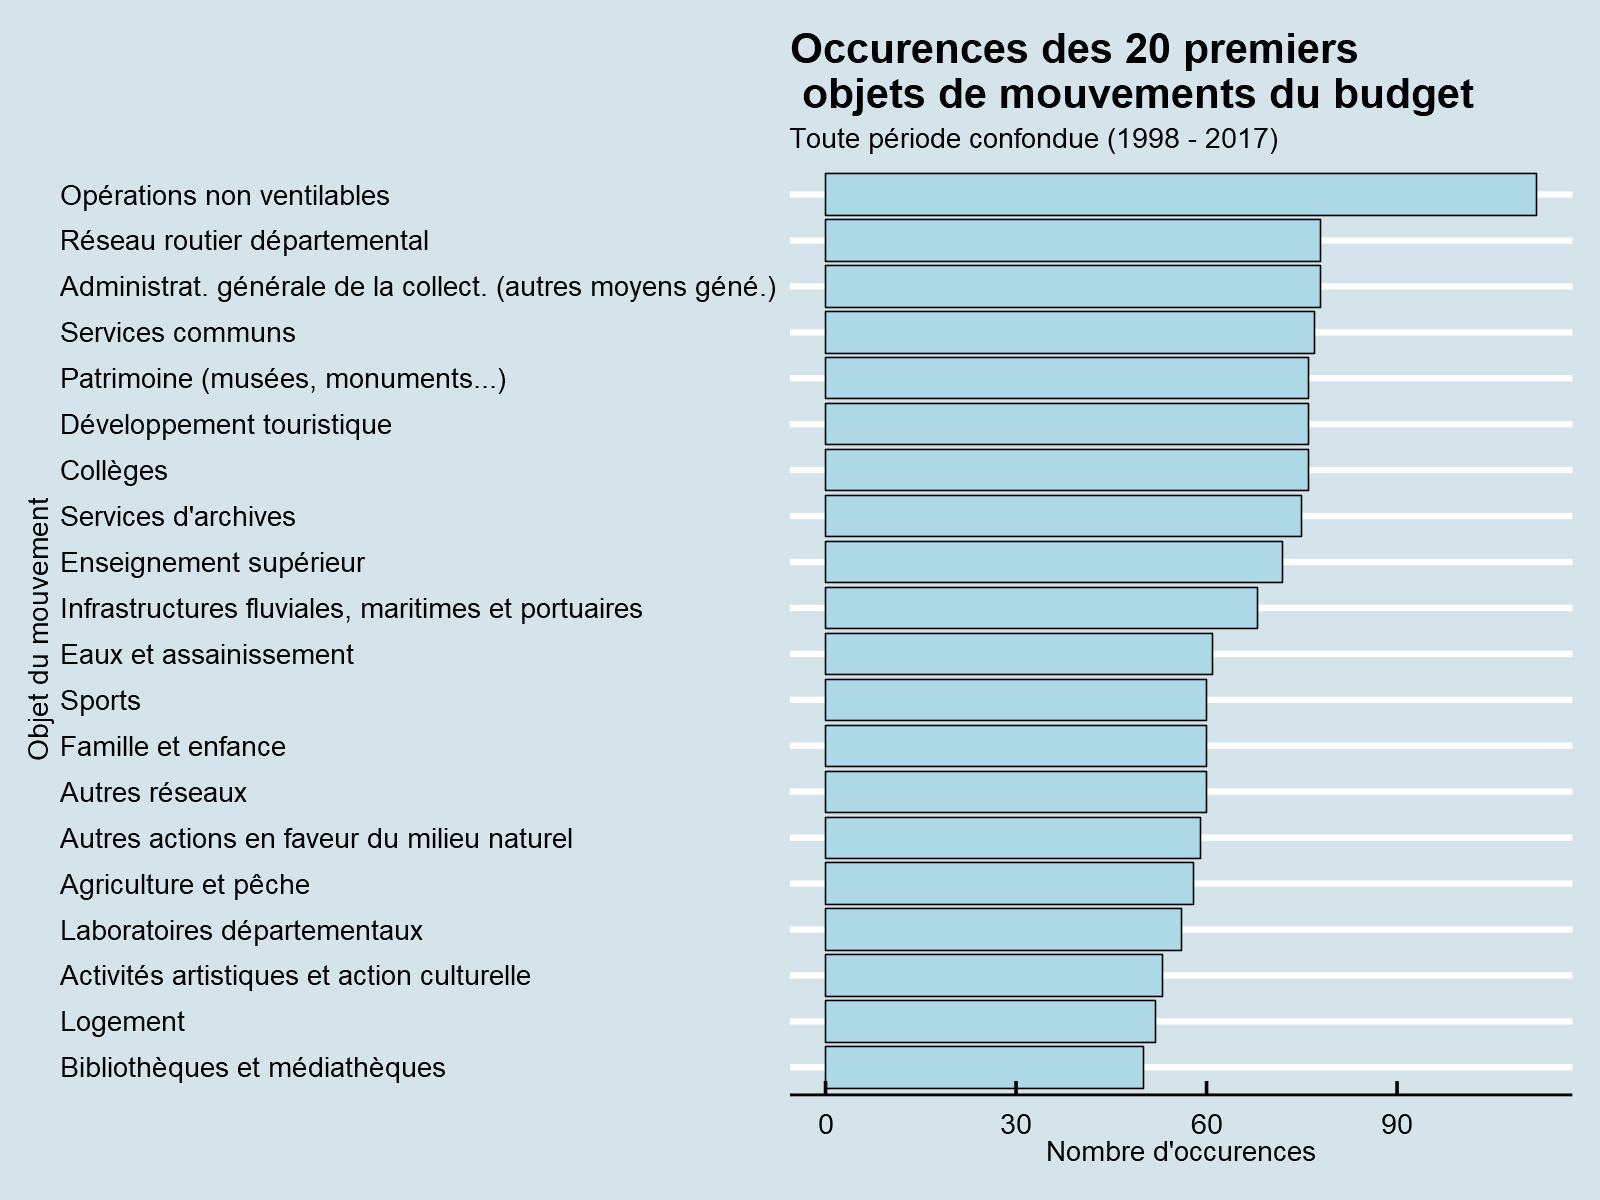

In [94]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
budget %>% group_by(`LIBELLE SOUS FONCTION`) %>%
summarize(count = n()) %>% arrange(desc(count)) %>% head(20) %>%
ggplot(aes(x = reorder(`LIBELLE SOUS FONCTION`, count), y = count)) +
geom_bar(stat = "identity",fill = "lightblue", col = "black", size = 0.2) + 
coord_flip() + theme_economist() + 
labs( x = "Objet du mouvement", y = "Nombre d'occurences", 
     title = "Occurences des 20 premiers \n objets de mouvements du budget",
    subtitle = "Toute période confondue (1998 - 2017)")

## Mots clés fréquents

In [118]:
mots_cles <- budget$`LIBELLE SOUS FONCTION` %>% VectorSource %>% Corpus

In [119]:
mots_cles <- tm_map(mots_cles, tolower)
mots_cles <- tm_map(mots_cles, removeWords, stopwords("french"))
mots_cles <- tm_map(mots_cles, removeWords, c("autre", "autres"))

In [135]:
dtm <- TermDocumentMatrix(mots_cles)

In [136]:
dtm <- dtm %>% as.matrix() %>% 
rowSums %>% sort(decreasing = T) %>% 
data.frame() %>% rownames_to_column
colnames(dtm) <- c("mot", "freq")

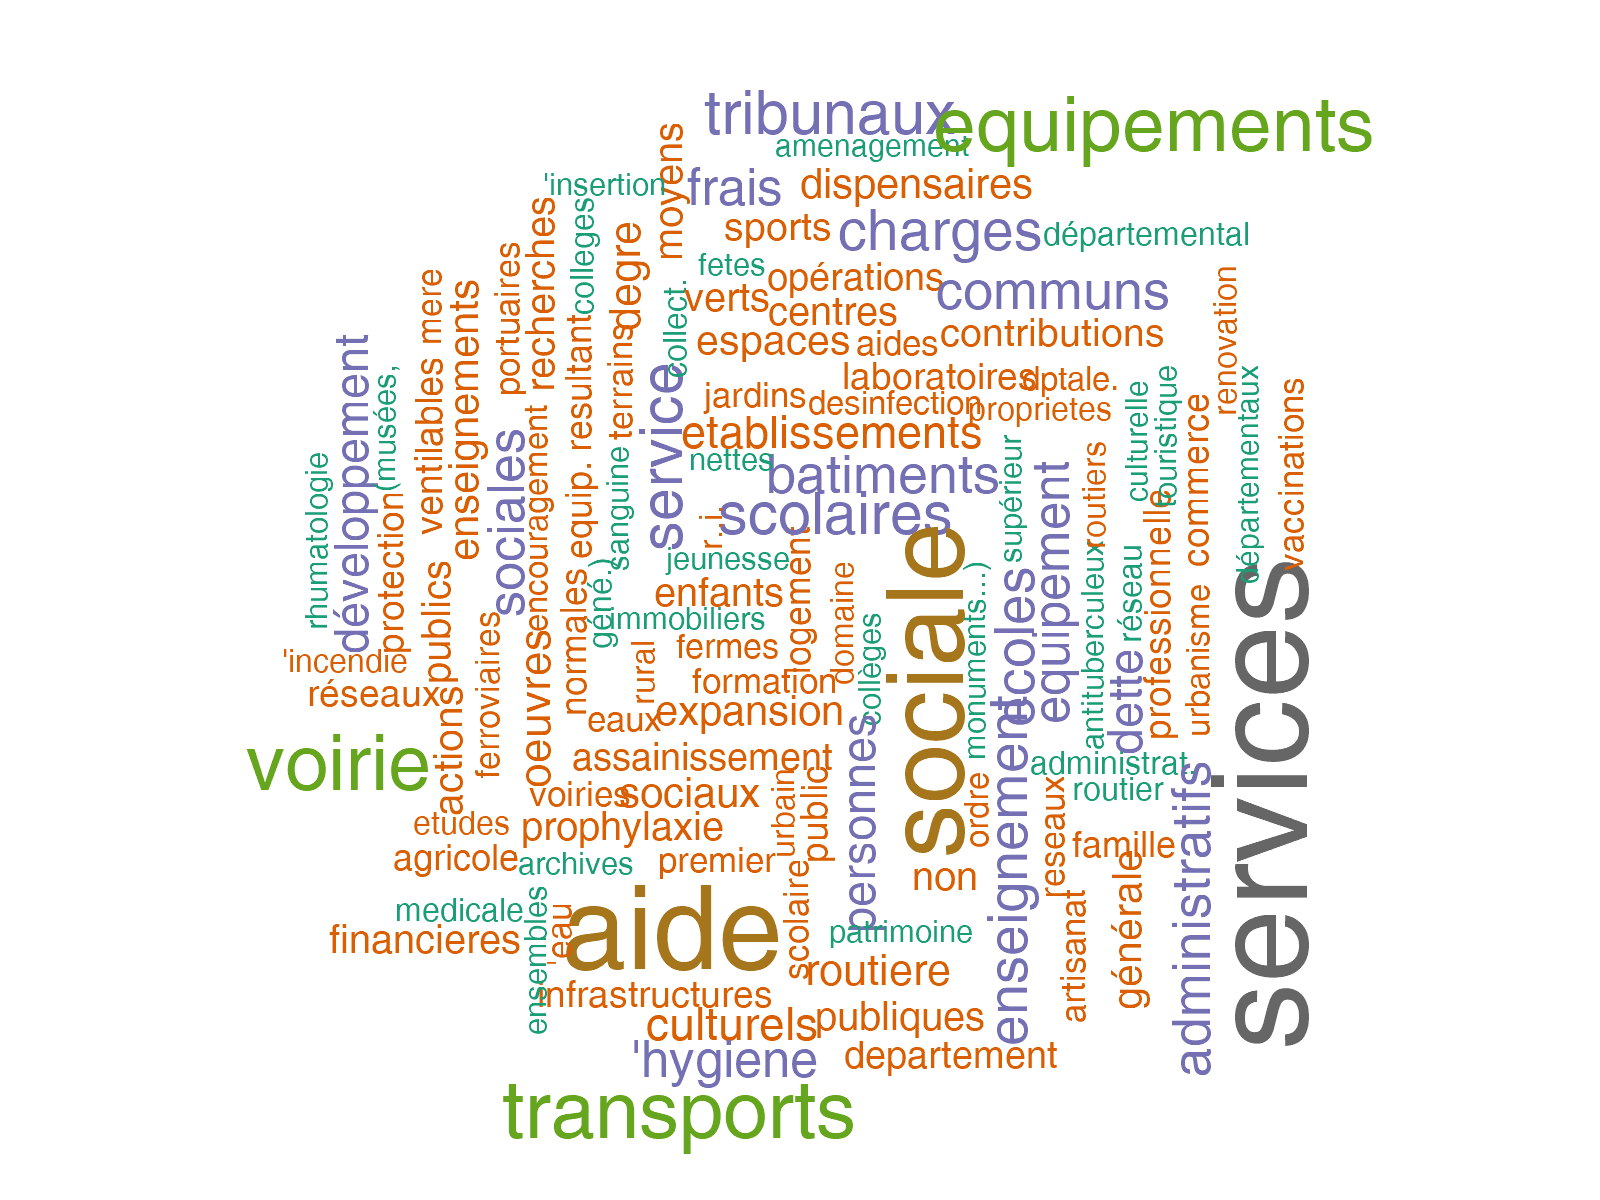

In [149]:
wordcloud(words = dtm$mot, freq = dtm$freq, 
          min.freq = 20, max.words = 120, random.orders = FALSE,rot.per = 0.45,
         colors = brewer.pal(8, "Dark2"))

## Evolution du budget

Les opérations réelles ont un impact direct sur la trésorerie,
il s'agit d'encaissements et décaissements effectifs.
Les opérations d’ordre n'ont pas de conséquences sur la trésorerie,
elles ne représentent que des jeux d'écriture :
- elles ne donnent lieu ni à encaissement, ni à décaissement,
- elles sont retracées en dépenses et en recettes,
- et sont équilibrées.

In [228]:
# Convertissons EXERCICE en année.
budget <- budget %>% mutate(EXERCICE = as.Date(ISOdate(EXERCICE, 1, 1)))

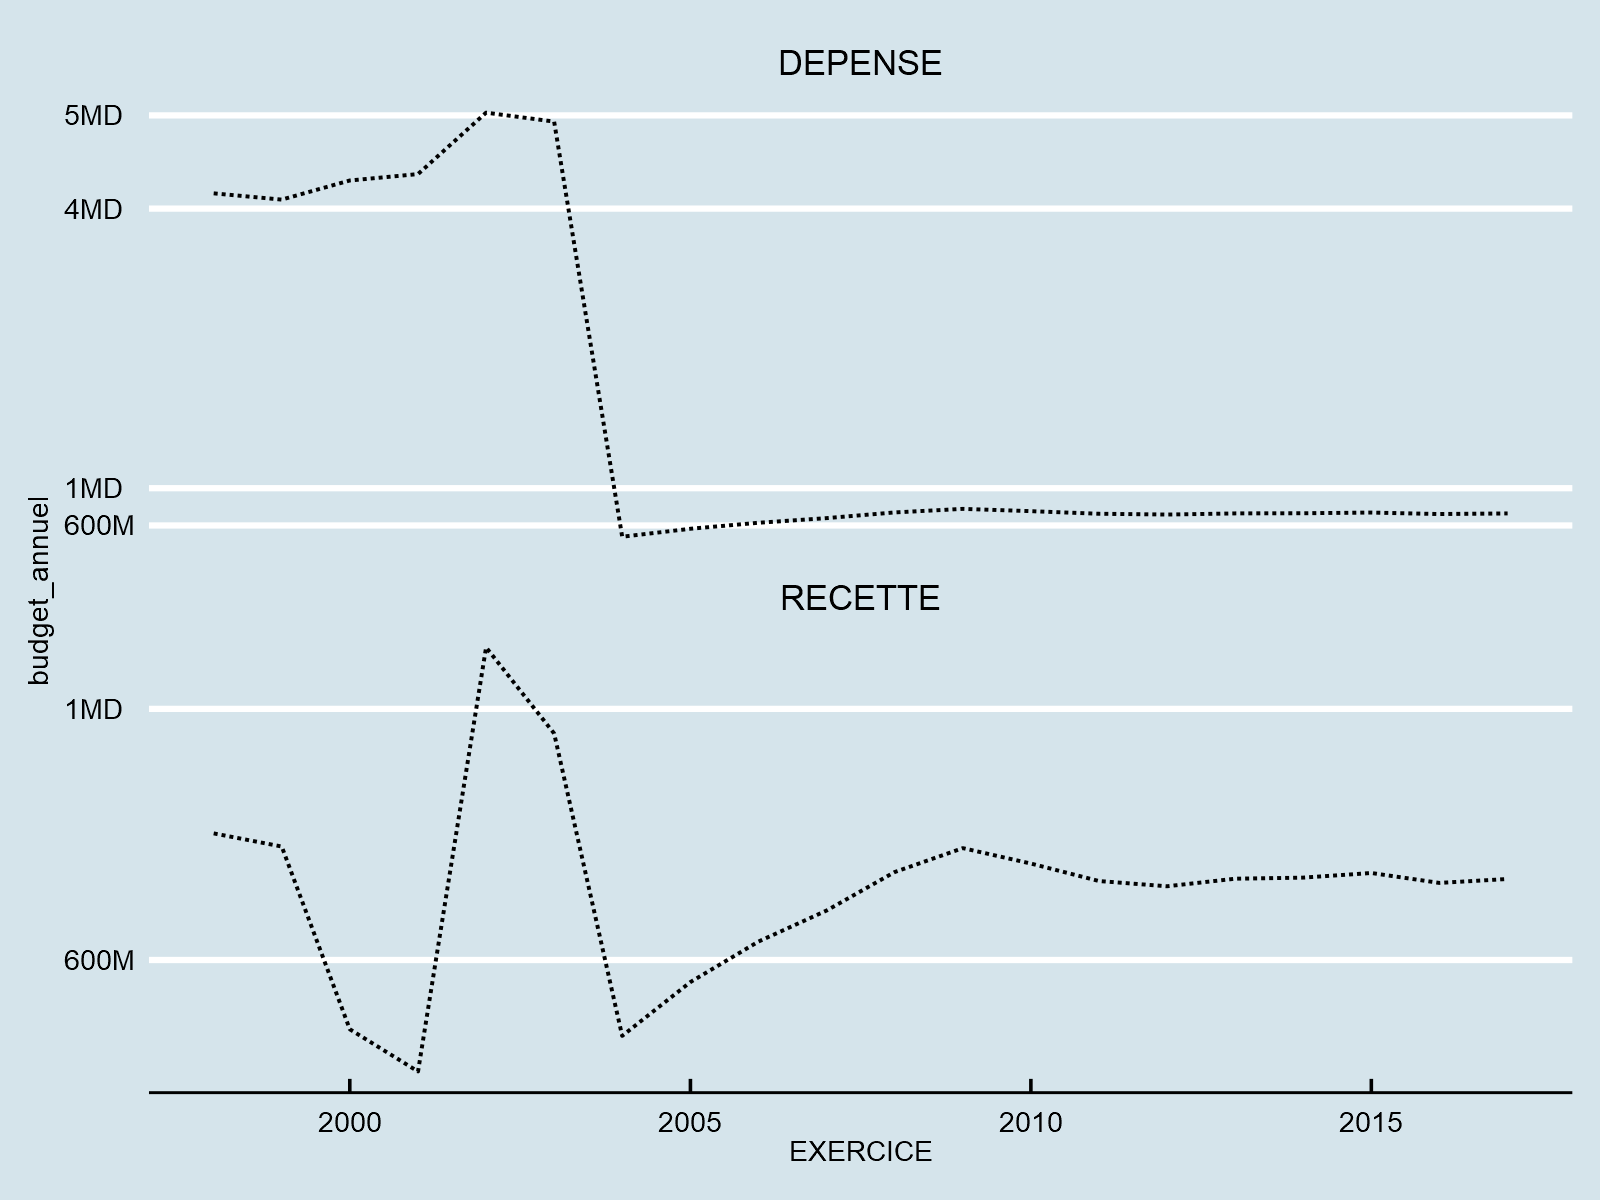

In [242]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
budget %>% filter(`NATURE MVTS` == "REEL") %>% 
group_by(EXERCICE, `TYPE MVT`) %>%
summarize(budget_annuel = sum(`BUDGET PRIMITIF`)) %>%
ggplot(aes(x = EXERCICE, y = budget_annuel)) + geom_line(linetype = 2) +
facet_wrap(~`TYPE MVT`, nrow = 2, scales = "free_y") + theme_economist() +
scale_y_continuous(breaks = c(6e8, 1e9, 4e9, 5e9), label = c("600M", "1MD", "4MD", "5MD"))

Zoomons à partir de 2003 pour observer l'évolution

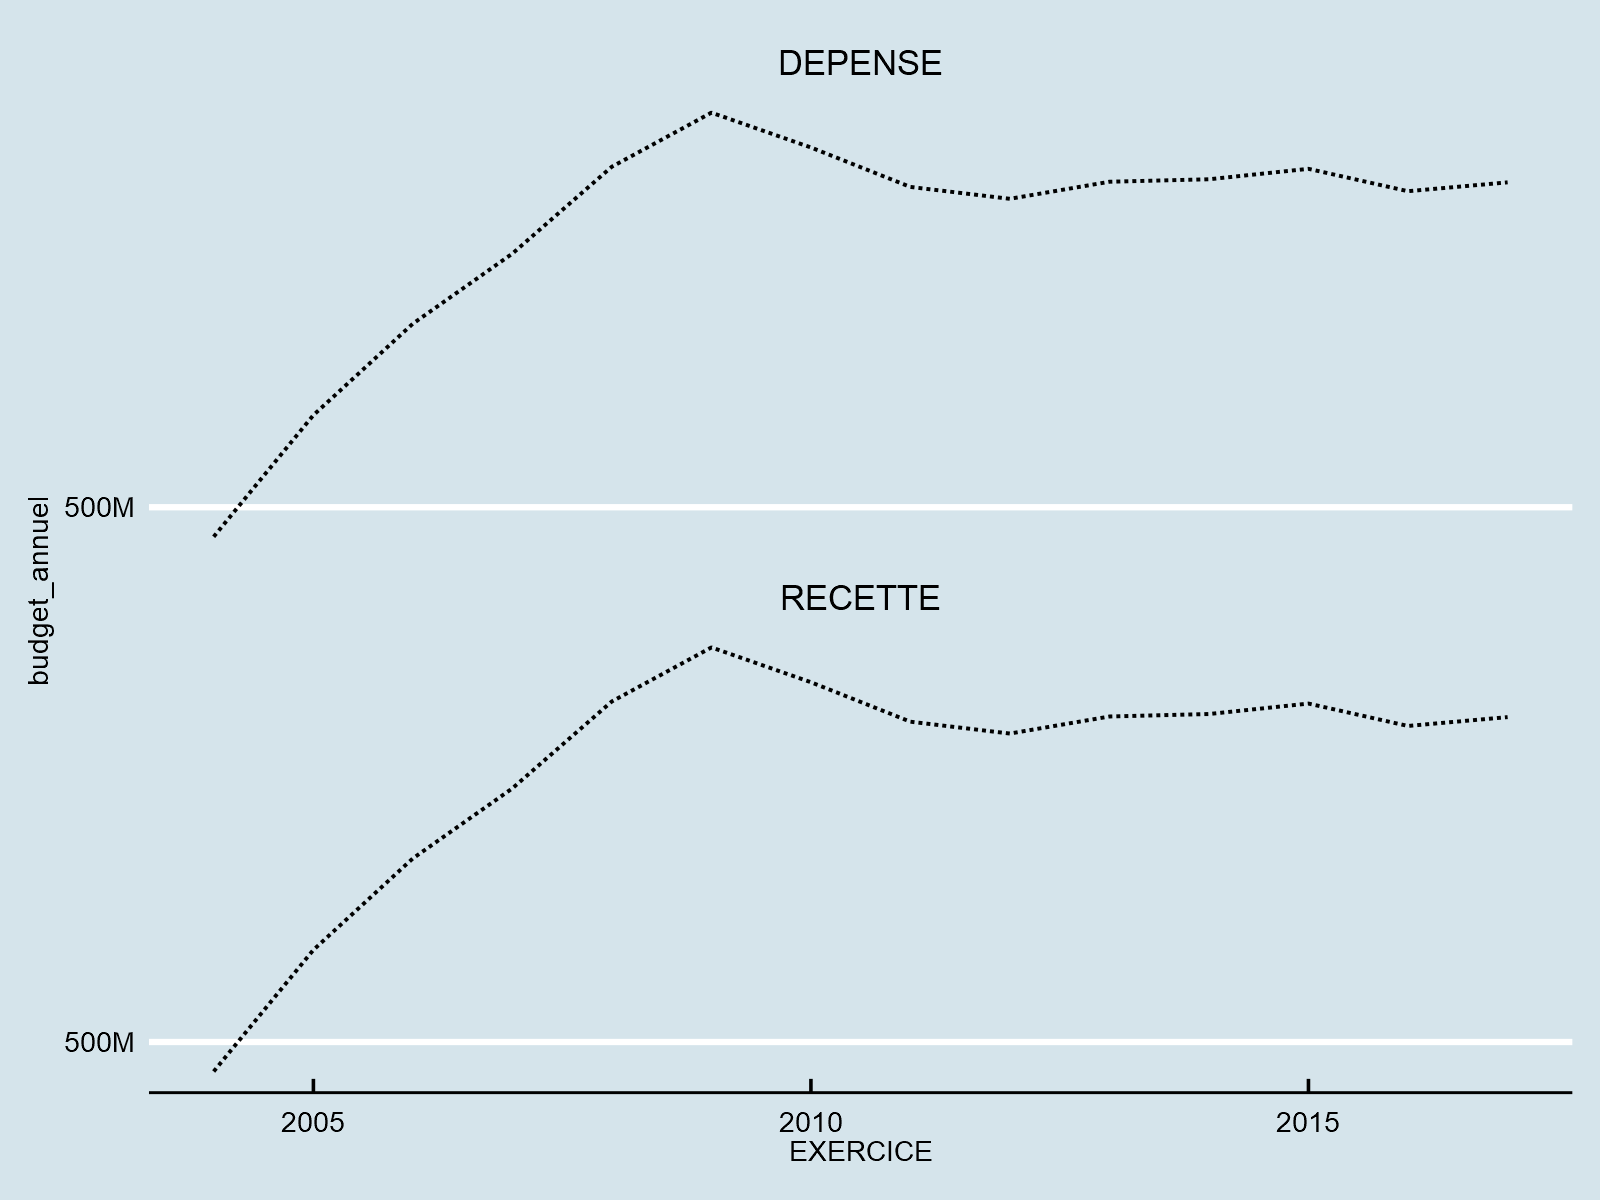

In [245]:
budget %>% filter(`NATURE MVTS` == "REEL" & EXERCICE > as.Date("2003-01-01")) %>% 
group_by(EXERCICE, `TYPE MVT`) %>%
summarize(budget_annuel = sum(`BUDGET PRIMITIF`)) %>%
ggplot(aes(x = EXERCICE, y = budget_annuel)) + geom_line(linetype = 2) +
facet_wrap(~`TYPE MVT`, nrow = 2, scales = "free_y") + theme_economist() +
scale_y_continuous(breaks = c(5e8, 8e8), 
                   label = c("500M", "600M"))